In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namikupa
Processing Record 2 of Set 1 | verkhniy avzyan
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | buariki
City not found. Skipping...
Processing Reco

Processing Record 36 of Set 4 | anadyr
Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | grimari
City not found. Skipping...
Processing Record 41 of Set 4 | atasu
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | barranca
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | valpacos
Processing Record 47 of Set 4 | bac lieu
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | mabai
Processing Record 50 of Set 4 | general roca
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | kacarevo
Processing Record 3 of Set 5 | barddhaman
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | krasnyy chikoy
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | mehamn
Processing Record 9 of S

Processing Record 26 of Set 8 | mirnyy
Processing Record 27 of Set 8 | weligama
Processing Record 28 of Set 8 | zhigalovo
Processing Record 29 of Set 8 | qabis
City not found. Skipping...
Processing Record 30 of Set 8 | usogorsk
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | ustka
Processing Record 33 of Set 8 | bagan
Processing Record 34 of Set 8 | moerai
Processing Record 35 of Set 8 | maniitsoq
Processing Record 36 of Set 8 | oranjemund
Processing Record 37 of Set 8 | patnagarh
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | mahajanga
Processing Record 40 of Set 8 | hualmay
Processing Record 41 of Set 8 | archidona
Processing Record 42 of Set 8 | viransehir
Processing Record 43 of Set 8 | bagamer
Processing Record 44 of Set 8 | nushki
Processing Record 45 of Set 8 | villazon
Processing Record 46 of Set 8 | meyungs
City not found. Skipping...
Processing Record 47 of Set 8 | labuhan
Processing Record 48 of Set 8 | artigas
Processing R

Processing Record 9 of Set 12 | longhua
Processing Record 10 of Set 12 | toliary
City not found. Skipping...
Processing Record 11 of Set 12 | krasnoarmeysk
Processing Record 12 of Set 12 | sambava
Processing Record 13 of Set 12 | luan
Processing Record 14 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 15 of Set 12 | yirol
City not found. Skipping...
Processing Record 16 of Set 12 | zalesovo
Processing Record 17 of Set 12 | north myrtle beach
Processing Record 18 of Set 12 | isla mujeres
Processing Record 19 of Set 12 | inhambane
Processing Record 20 of Set 12 | fairfield
Processing Record 21 of Set 12 | faya
Processing Record 22 of Set 12 | pitimbu
Processing Record 23 of Set 12 | bure
Processing Record 24 of Set 12 | jizan
Processing Record 25 of Set 12 | pisco
Processing Record 26 of Set 12 | batagay-alyta
Processing Record 27 of Set 12 | ilula
Processing Record 28 of Set 12 | fukue
Processing Record 29 of Set 12 | boende
Processing Record 30 of Set 12 | albury
P

In [10]:
len(city_data)

555

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namikupa,-10.8333,39.6000,69.28,98,100,2.33,TZ,2022-03-30 01:33:36
1,Verkhniy Avzyan,53.5289,57.5372,30.47,93,100,9.22,RU,2022-03-30 01:33:37
2,Bredasdorp,-34.5322,20.0403,60.40,69,0,8.90,ZA,2022-03-30 01:33:38
3,Cidreira,-30.1811,-50.2056,73.51,86,100,17.49,BR,2022-03-30 01:33:38
4,Barrow,71.2906,-156.7887,-9.38,70,0,18.41,US,2022-03-30 01:33:39
5,Rikitea,-23.1203,-134.9692,78.80,67,71,8.28,PF,2022-03-30 01:33:40
6,Atuona,-9.8000,-139.0333,79.50,80,100,14.47,PF,2022-03-30 01:33:40
7,Rio Grande,-32.0350,-52.0986,71.94,91,56,10.45,BR,2022-03-30 01:32:36
8,Hobart,-42.8794,147.3294,58.26,88,75,14.97,AU,2022-03-30 01:31:10
9,Punta Arenas,-53.1500,-70.9167,44.71,70,75,19.57,CL,2022-03-30 01:30:44


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namikupa,TZ,2022-03-30 01:33:36,-10.8333,39.6000,69.28,98,100,2.33
1,Verkhniy Avzyan,RU,2022-03-30 01:33:37,53.5289,57.5372,30.47,93,100,9.22
2,Bredasdorp,ZA,2022-03-30 01:33:38,-34.5322,20.0403,60.40,69,0,8.90
3,Cidreira,BR,2022-03-30 01:33:38,-30.1811,-50.2056,73.51,86,100,17.49
4,Barrow,US,2022-03-30 01:33:39,71.2906,-156.7887,-9.38,70,0,18.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

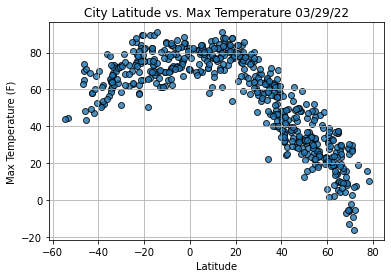

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

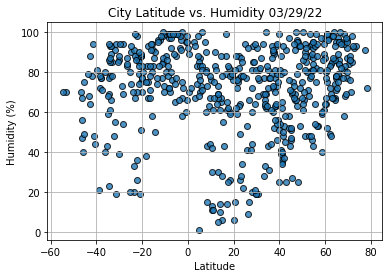

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

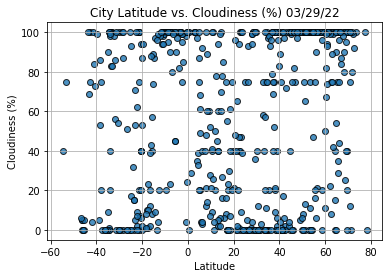

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

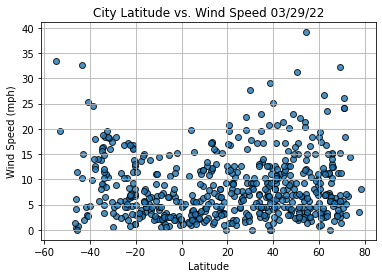

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()